<a href="https://colab.research.google.com/github/tc11echo/data-structure-and-algorithm-in-python/blob/main/searching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching

---

# Linear Search / Sequential Search

### Description
* Work by sequentially checking each element of the list until a match is found or the whole list has been searched
* Sorted / Unsorted data
* Simple
* Brute Force

<br/>

|Best Time Complexity|Average Time Complexity|Worst Time Complexity|Worst Space Complexity|
|:---:|:---:|:---:|:---:|
|O(1)|O(n/2)|O(n)|O(1)|

<br/>

In [ ]:
def linear_search(arr, target):
  for i in range(len(arr)):
    if arr[i] == target:
      return i
  return -1
    
arr=[1,2,3,4,5,6,7,8]
index=linear_search(arr, 2)
if index >= 0:
  print("found! index:"+str(index))
else:
  print("can't find")

found! index:1


---

# Binary Search

### Description
* Work by comparing the target value to the middle element of the array. If they are not equal, the half in which the target cannot lie is eliminated and the search continues on the remaining half, again taking the middle element to compare to the target value, and repeating this until the target value is found. If the search ends with the remaining half being empty, the target is not in the array.
* Sorted data
* Divide and Conquer

<br/>

|Best Time Complexity|Average Time Complexity|Worst Time Complexity|Worst Space Complexity|
|:---:|:---:|:---:|:---:|
|O(1)|O(logn)|O(logn)|O(1)|

<br/>

In [ ]:
def binary_search(arr, target):
  upper=len(arr)-1
  low=0
  while low<=upper:
    mid=(low+upper)//2
    if arr[mid]<target:
      low=mid+1
    elif arr[mid]>target:
      upper=mid-1
    else:
      return mid
  return -1

arr=[1,3,4,6,7,8,32,40]
index=binary_search(arr, 8)
print("found! index:"+str(index) if index>=0 else "can't find")

found! index:5


---
# Interpolation Search

### Description
* Work by using interpolation formula
* Sorted data

Formula 1:

$$
\frac{data[mid]-data[low]}{data[upper]-data[low]}=\frac{mid-low}{upper-low}
$$

Formula 2:

$$
mid=(upper-low)* \frac{data[mid]-data[low]}{data[upper]-data[low]} + low
$$

<br/>

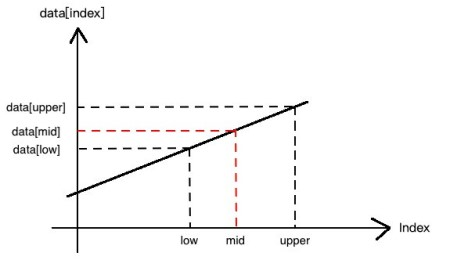


<br/>

|Best Time Complexity|Average Time Complexity|Worst Time Complexity|Worst Space Complexity|
|:---:|:---:|:---:|:---:|
|O(1)|O(loglogn)|O(n)|O(1)|

<br/>

In [ ]:
def interpolation_search(arr, target):
  upper=len(arr)-1
  low=0
  while low <= upper:
    mid=int((upper-low)*(target-arr[low])/(arr[upper]-arr[low])+low)
    if mid<low or mid>upper:
      break
    if target<arr[mid]:
      upper=mid-1
    elif target>arr[mid]:
      low=mid+1
    else:
      return mid
  return -1

arr=[1,3,4,6,7,8,32,40]
index=interpolation_search(arr, 6)
print("found! index:"+str(index) if index>=0 else "can't find")

found! index:3


---

# Fibonacci Search

### Description
* Work by using fibonacci sequence
* Sorted data

Fibonacci Sequence:
$$
\begin{split}F_0&=0
\\ F_1&=1
\\ F_n &= F_{n-1}+F{n-2},\ where(n \geq 2)
\end{split}
$$

Fibonacci Sequence Value: $0,1,1,2,3,5,8,13,21,34,55,89,144,...$

<br/>

|Best Time Complexity|Average Time Complexity|Worst Time Complexity|Worst Space Complexity|
|:---:|:---:|:---:|:---:|
|O(1)|O(logn)|O(logn)|O(1)|

<br/>

In [ ]:
def get_fibonacci(max):
  fib=[None]*max
  fib[0], fib[1]=0, 1
  for i in range(2, max):
    fib[i]=fib[i-1]+fib[i-2]
  return fib

def find_y(fib, n):
  i=0
  while fib[i]<=n:
    i+=1
  return i-1

def fibonacci_search(arr, target):
  fib=get_fibonacci(len(arr))
  length=len(arr)
  y=find_y(fib, length) # return the index of number in fibonacci sequence, which is equal or just smaaler than the length of data list
  m=length-1-fib[y] # max=length-1
  x=y-1 # find the starting search point of arr
  #print(f"x={x}, m={m}, fib[x]={fib[x]}")
  i=x
  if arr[i]<target:
    i+=m
  #print(f"x={x}, i={i}")
  while fib[x]>0:
    #print(f"x={x}, i={i}")
    if arr[i]<target:
      x-=1
      i+=fib[x]
    elif arr[i]>target:
      x-=1
      i-=fib[x]
    else:
      return i
  return -1

#arr=[10,22,30,44,56,58,60,110,130]
arr=[0,1,2,3,4,5,6,7,8]
index=fibonacci_search(arr, 4)
print("found! index:"+str(index) if index>=0 else "can't find")

found! index:4


---

# Exponential Search / Doubling Search / Galloping Search / Struzik Search

### Description
* Work by deciding the search range with exponential spacing, then apply binary search
* Sorted data which is unbounded (unknown size)

<br/>

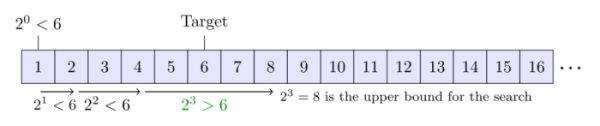

<br/>

|Best Time Complexity|Average Time Complexity|Worst Time Complexity|Worst Space Complexity|
|:---:|:---:|:---:|:---:|
|O(1)|O(logi)|O(logi)|O(1)|

where $i$ is the index of the element being searched for in the list

<br/>

In [ ]:
def binary_search(arr, target):
  upper=len(arr)-1
  low=0
  while low<=upper:
    mid=(low+upper)//2
    if arr[mid]<target:
      low=mid+1
    elif arr[mid]>target:
      upper=mid-1
    else:
      return mid
  return -1

def exponential_search(arr, target):
  # if target is present at first location
  if arr[0]==target:
    return 0
  # find range for binary search i by repeated doubling
  i=1
  while i<len(arr) and arr[i]<=target:
    i=i*2
  return binary_search(arr[:i], target)

arr=[2,3,4,10,40]
index=exponential_search(arr, 2)
print("found! index:"+str(index) if index>=0 else "can't find")

found! index:0
